In [2]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def cheb(y,i):
  if(i==0): return 1
  if(i==1): return y
  return 2*y*cheb(y,i-1)-cheb(y,i-2)

In [4]:
def d_cheb(y,i):
  if(i==0): return 0
  if(i==1): return 1
  return 2*(y*d_cheb(y,i-1)+cheb(y,i-1))-d_cheb(y,i-2)

In [5]:
def d2_cheb(y,i):
  if(i==0): return 0
  if(i==1): return 0
  return 2*(y*d2_cheb(y,i-1)+d_cheb(y,i-1)+d_cheb(y,i-1))-d2_cheb(y,i-2)

In [6]:
def d3_cheb(y,i):
  if(i==0): return 0
  if(i==1): return 0
  if(i==2): return 0
  return 2*(y*d3_cheb(y,i-1)+d2_cheb(y,i-1)+d2_cheb(y,i-1)+d2_cheb(y,i-1))-d3_cheb(y,i-2)

In [7]:
def d4_cheb(y,i):
  if(i<4): return 0
  return 2*(y*d4_cheb(y,i-1)+d3_cheb(y,i-1)+d3_cheb(y,i-1)+d3_cheb(y,i-1)+d3_cheb(y,i-1))-d4_cheb(y,i-2)

In [8]:
def y_k(n,k):
  return np.cos((2*k-1)*np.pi/(2*n))

In [9]:
for k in range(1,6):
  print((10+0.5)/2+(10-0.5)/2*y_k(6,k))

9.838147674873074
8.608757210636101
6.479390464236974
4.020609535763027
1.8912427893638997


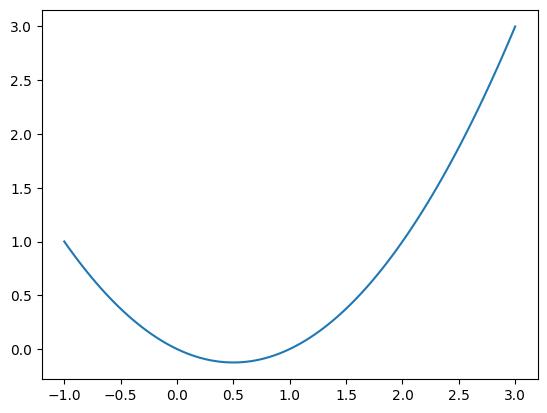

In [10]:
x= np.linspace(-1, 3, 100)
plt.plot(x, 0.5*x*x-0.5*x)

In [11]:
def y_j(x_c, x, h):
  return (x-x_c)/h

In [12]:
def x_j(x_c, y, h):
  return h*y+x_c

In [13]:
def w(x):
  return (x**2)*((1-x)**2)*np.exp(1*x)

def d4_w(x):
  return 12*np.exp(x)*(1-x)**2-36*(1-x)*np.exp(x)+12*np.exp(x)+8*x*np.exp(x)*(1-x)**2-36*x*(1-x)*np.exp(x)+48*x*np.exp(x)+22*x*x*np.exp(x)+2*x*x*x*np.exp(x)+x*x*np.exp(x)*(1-x)**2-6*(1-x)*x*x*np.exp(x)

In [14]:
x = np.arange(0,1.001,0.01)

In [15]:
kor = np.array([y_k(5,k) for k in range(1,6)])[::-1]
print(x_j(0.05,kor,0.05))

[0.00244717 0.02061074 0.05       0.07938926 0.09755283]


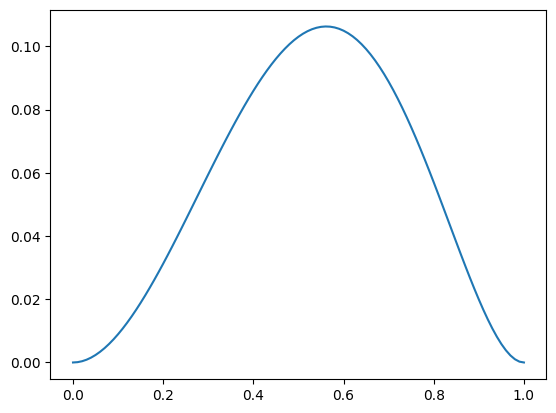

In [16]:
plt.plot(x,w(x))

In [17]:
def Gaus(A,F,N):
  x = np.zeros(N+1)
  for i in range(0,N):
    for j in range(i+1,N+1):
      coef = A[j][i]/A[i][i]
      A[j]=A[j]-A[i]*coef
      F[j] = F[j]-F[i]*coef
  for i in range(N,-1,-1):
    suma =0
    for j in range(N,i,-1):
      suma+=A[i][j]*x[j]
    #print(suma)
    x[i] = (F[i] - suma)/A[i][i]
  #print(A)
  #print(x)
  #print(F)
  return x

In [18]:
def ans(c,x,x_c,h):
  y=y_j(x_c,x,h)
  #print(y)
  ans_ = 0
  for i in range(len(c)):
    ans_+=c[i]*cheb(y,i)#/(h**i)

  return ans_

In [19]:
def dlina(x):
  dlina_x=0;
  for i in range(0,len(x)):
      dlina_x+=x[i]**2

  dlina_x = np.sqrt(dlina_x)
  return dlina_x

In [20]:
def HAUS(A):
  #print(A.shape)
  U = []
  for n in range(A.shape[1]):
    #print(A)
    A_n = A[n:,n:].copy()
    A_n = np.array(A_n)
    #print(n)
    #print(A_n.shape)
    x = np.array(A_n[:,0])

    e = np.zeros(len(x))
    e[0] = 1
    #print(x)
    u = x+np.sign(x[0])*dlina(x)*e
    #print(u)
    u = (u/dlina(u))

    u = u.reshape(-1,1)
    U.append(u)
    #print(u)
    u_t = u.copy().reshape(1,len(u))

    s= u_t.dot(A_n)
    #print(s)

    s = np.dot(u,s)
    #print(s)
    A_n = A_n -2*s

    for i in range(n,A.shape[0]):
      for j in range(n,A.shape[1]):
        A[i][j] = (A_n[i-n][j-n])
  #U = np.array(U).reshape(A.shape[1],A.shape[])
  return A, U

In [21]:
def kril(x): #size = k+1
  k = len(x)

  r = np.array([x[i+1]-x[i] for i in range(k-1)])
  A = []
  for i in range(k-2):
    A.append(r[i+1]-r[i])
  A = np.array(A)

  A = np.transpose(A)
  #print(A)
  b = -r[k-2]
  u , s, vh = np.linalg.svd(A, full_matrices=True)
  E = np.zeros(len(s)*len(s)).reshape(len(s),len(s))
  #print(u)
  for i in range(len(s)):
    E[i][i] = s[i]
  b_new = (np.transpose(u)).dot(b)

  y= Gaus(E.copy(),b_new.copy(),len(s)-1)
  alpha = Gaus(vh.copy(),y.copy(),len(s)-1)

  x_n = x[k-1].copy()
  for i in range(0,k-2):
    x_n = x_n+alpha[i]*r[i+1]
  return x_n

In [22]:
def oshibka(x_2h,x_c,c,K,h):
  kol = 5
  x_now = np.array([np.linspace(x_2h[i],x_2h[i+1],kol) for i in range(K)])
  ans_ = np.array([ans(c[i],x_now[i],x_c[i],h) for i in range(K)])
  return np.abs(ans_.reshape(K*kol)-w(x_now.reshape(K*kol))).max()

In [26]:
A = []
R = []
U = []
N=5
kor = np.array([y_k(N+1,i+1) for i in range(0,N+1)])[::-1]
#print(kor)
K=3
l=1
h = l/(2*K)
p_m = np.array([1,h,h**2,h**3])
p_b = np.array([1,h])
p_c = h**4
for k in [0,1,K-1]:
    #print(k)

    A_i = []
    #print(x_j(x_c[k],kor,h))
    if(k<K-1):
      if(k>0):
        for i in range(N+1):
          A_i.append(p_m[0]*cheb(1,i)+p_m[1]*d_cheb(1,i)/h)
        for i in range(N+1):
          A_i.append(p_m[0]*cheb(-1,i)-p_m[1]*d_cheb(-1,i)/h)



        for i in range(N+1):
          A_i.append(p_m[2]*d2_cheb(1,i)/(h*h)+p_m[3]*d3_cheb(1,i)/(h**3))
        for i in range(N+1):
          A_i.append(p_m[2]*d2_cheb(-1,i)/(h*h)-p_m[3]*d3_cheb(-1,i)/(h**3))
      else:
        for i in range(N+1):
          A_i.append(p_m[0]*cheb(1,i)+p_m[1]*d_cheb(1,i)/h)

        for i in range(N+1):
          A_i.append(p_b[0]*cheb(-1,i))

        for i in range(N+1):
          A_i.append(p_m[2]*d2_cheb(1,i)/(h*h)+p_m[3]*d3_cheb(1,i)/(h**3))



        for i in range(N+1):
          A_i.append(p_b[1]*d_cheb(-1,i)/h)

    else:
      #print(k)

      for i in range(N+1):
        A_i.append(p_b[0]*cheb(1,i))

      for i in range(N+1):
          A_i.append(p_m[0]*cheb(-1,i)-p_m[1]*d_cheb(-1,i)/h)

      for i in range(N+1):
        A_i.append(p_b[1]*d_cheb(1,i)/h)

      for i in range(N+1):
          A_i.append(p_m[2]*d2_cheb(-1,i)/(h*h)-p_m[3]*d3_cheb(-1,i)/(h**3))


    for j in kor:
      for i in range(N+1):
        koef = p_c*d4_cheb(j,i)/(h**4)
        #print(koef)
        A_i.append(koef)
      #print(j,x_j(x_c[k],j,h))



    A_i = np.array(A_i).reshape(N+5,N+1)
    #print(A_i)
    R_i, U_i=(HAUS(A_i.copy()))
    R.append(R_i)
    U.append(U_i)
    A.append(A_i)

def MKNK(K, C=np.zeros(1), u_old=np.zeros(1)):
  koefff = 10#int((N+1)*K*0.75)
  print("koef=",koefff)
  x_osh = []
  y_osh = []
  x_i = []
  #K = 10 #np.array([5,10,20,40,80,160])
  l = 1
  e = 1e-13
  h = l/(2*K)
  #print(h)
  print(K)
  x_2h = np.linspace(0,l,K+1)
  x_c = np.array([ (x_2h[i+1]+x_2h[i])/2 for i in range(0,K)]  )
  if(len(C)==1):  c = np.array([0.4]*(N+1)*(K)).reshape(K,N+1)
  else:
    #print((x_2h[0]+x_2h[1])/2)
    c = np.array([C[i//2] for i in range(K)]).reshape(K,N+1)
    for i in range(K):
      X_center_2 = (x_2h[i]+x_2h[i+1])/2
      if(i%2==0):
        X_center_1 = x_2h[i+1]
      else:
        x_center_1 = x_2h[i]
      d = (X_center_2-X_center_1)/(2*h)
      cc = np.zeros(N+1)
      cc[0] = c[i][0]+c[i][1]*d+c[i][2]*d*d+c[i][3]*d*d*d+c[i][4]*d**4
      cc[1] = c[i][1]/2+c[i][2]*d+c[i][3]*3/2*d*d+c[i][4]*2*d*d*d
      cc[2] = c[i][2]/4+c[i][3]*3/4*d+c[i][4]*3/2*d*d
      cc[3] = c[i][3]/8+c[i][4]/2*d
      cc[4] = c[i][4]/16

      #cc[0] = c[i][0]/2+c[i][1]*d+c[i][2]*(2*d*d-1)+c[i][3]*(4*d*d*d-3*d)+c[i][4]*(8*(d**4)-8*d*d+1)
      #cc[1] = c[i][1]/2+c[i][2]*2*d+c[i][3]*(2*3*d*d-1.5)+c[i][4]*(16*d*d*d-4*d)
      #cc[2] = c[i][2]/2+c[i][3]*3*d+c[i][4]*(4*3*d*d-3)
      #cc[3] = c[i][3]/2+c[i][4]*4*d
      #cc[4] = c[i][4]/2
      #print(np.abs(c[i]-cc).max())
      c[i] = cc.copy()

    #c = np.array([C[i//2] for i in range(K)]).reshape(K,N+1)
  p_c = h**4

  p_m = np.array([1,h,h**2,h**3])
  p_b = np.array([1,h])
  c_prev = np.zeros(c.shape)
  #print(c_prev)
  iter =0




  #print(A)
  #print(A_T)
  time_1 = time.time()
  #x_osh.append(iter)
  #y_osh.append(oshibka(x_2h,x_c,c,K,h))
  while((np.abs(c-c_prev).max()>e)):
    #print(c[0])
    #print(c)
    #print(iter, y_osh[len(y_osh)-1])
    if(iter>0):
      x_i.append((c.copy()).reshape(c.shape[0]*c.shape[1]))

      if(iter%koefff==0):
          #iter+=1
          #if((y_osh[len(y_osh)-1]-y_osh[len(y_osh)-2])<0):
          c=kril(x_i.copy()).reshape(K,N+1)
          #x_i.append((c.copy()).reshape(c.shape[0]*c.shape[1]))
          x_i = []

    iter+=1

    c_prev = c.copy()
    #print(iter)
    for k in range(0,K):
      #print(k)

      A_i = []

      U_i = []
      R_i = []
      if(k==0):
        A_i = A[0]

        U_i = U[0]
        R_i = R[0]
      else:
        if(k==K-1):
          A_i = A[2]

          U_i = U[2]
          R_i = R[2]
        else:
          A_i = A[1]

          U_i = U[1]
          R_i = R[1]

      b = []
      if(k<K-1):
        if(k>0):

          right = 0
          for i in range(N+1):
            right+=c[k+1][i]*(p_m[0]*cheb(-1,i)+p_m[1]*d_cheb(-1,i)/h)
          b.append(right)
          left = 0
          for i in range(N+1):
            left+=c[k-1][i]*(p_m[0]*cheb(1,i)-p_m[1]*d_cheb(1,i)/h)
          b.append(left)


          right=0
          for i in range(N+1):
            right+=c[k+1][i]*(p_m[2]*d2_cheb(-1,i)/(h*h)+p_m[3]*d3_cheb(-1,i)/(h**3))
          b.append(right)
          left = 0
          for i in range(N+1):
            left+=c[k-1][i]*(p_m[2]*d2_cheb(1,i)/(h*h)-p_m[3]*d3_cheb(1,i)/(h**3))
          b.append(left)
        else:
          right = 0
          for i in range(N+1):
            right+=c[k+1][i]*(p_m[0]*cheb(-1,i)+p_m[1]*d_cheb(-1,i)/h)
          b.append(right)
          b.append(0)
          right=0
          for i in range(N+1):
            right+=c[k+1][i]*(p_m[2]*d2_cheb(-1,i)/(h*h)+p_m[3]*d3_cheb(-1,i)/(h**3))
          b.append(right)
          b.append(0)

      else:
        #print(k)
        b.append(0)
        left = 0
        for i in range(N+1):
            left+=c[k-1][i]*(p_m[0]*cheb(1,i)-p_m[1]*d_cheb(1,i)/h)
        b.append(left)
        b.append(0)
        left = 0
        for i in range(N+1):
            left+=c[k-1][i]*(p_m[2]*d2_cheb(1,i)/(h*h)-p_m[3]*d3_cheb(1,i)/(h**3))
        b.append(left)







      #print(x_j(x_c[k],kor,h))
      for j in kor:
        b.append(p_c*d4_w(x_j(x_c[k],j,h)))
      #if(c[0][0]==0.4):
      #  print(b)

      b = np.array(b)
      #print(b)
      for n in range(A_i.shape[1]):
        b_n = np.array(b[n:])

        b_n= b_n.reshape(len(b_n),1)
        u= U_i[n]
        u_t = u.reshape(1,len(u))
        s = u_t.dot(b_n)

        s = u.dot(s)




        b_n = b_n -2*s

        b_n = b_n.reshape(-1,1)

        for i in range(n,A_i.shape[0]):
          b[i] = b_n[i-n]

      #A_i_T = np.transpose(A_i)
      #b = A_i_T.dot(b)
      #A_i_T_A_i_inv = np.linalg.inv(A_i_T.dot(A_i))
      #c[k] = A_i_T_A_i_inv.dot(b)

      #A_i_T_A_i = A_i_T.dot(A_i)
      c[k] = Gaus(R_i.copy(), b.copy(), N)#(A_i_T_A_i_inv.dot(b))#[::-1]
    #print(c)
    #print()
    x_osh.append(iter)
    y_osh.append((np.abs(c-c_prev).max()))
    #x_osh.append(iter)
    #y_osh.append(oshibka(x_2h,x_c,c,K,h))
      #print(c[k])
      #print(A_i)
      #print(b)
  time_2 = time.time()
  #print(K)
  print(iter)
  print(time_2-time_1)
  # 5 10 20 40 80 160
  # 5*160 10*80 20*40 80*10 160*5
  kol = 100*int(800/K)
  x_now = np.array([np.linspace(x_2h[i],x_2h[i+1],kol, endpoint=False) for i in range(K)])
  ans_ = np.array([ans(c[i],x_now[i],x_c[i],h) for i in range(K)])
  #print(x_now)
  #plt.subplots(figsize=(7,7))

  #plt.show()

  plt.plot(x_now.reshape(K*kol),1*w(x_now.reshape(K*kol)), lw=6,alpha=1, label = 'Точное решение')
  plt.plot(x_now.reshape(K*kol),1*ans_.reshape(K*kol), lw=3, label = f'Решение МКНК K={K}')
  plt.grid()
  plt.xlabel("x", size=20)
  plt.ylabel("y", size=20)
  plt.xticks(size=15)
  plt.yticks(size=15)
  plt.legend(prop={'size': 15})
  plt.show()

  plt.subplots(figsize=(7,7))
  plt.plot(x_osh,y_osh, label = f'Ошибка K={K}')
  plt.xlabel("iter", size=20)
  plt.ylabel("Ошибка", size=20)
  plt.xticks(size=15)
  plt.yticks(size=15 )
  plt.legend(prop={'size': 15})
  plt.grid()
  plt.show()

  #plt.show()
  #u(x+1)h = u(x)+hu'+h^2*u''/2
  #u(x+1)2h = u(x)+2h*u' +2*h^2*u''
  #ans_new = 4u+4hu'+2h^2*u''-u-2h*u' -2*h^2
  print("{:e}".format(np.abs(ans_.reshape(K*kol)-w(x_now.reshape(K*kol))).max()/np.abs(w(x_now.reshape(K*kol))).max()))
  print("{:e}".format(np.abs(ans_.reshape(K*kol)-w(x_now.reshape(K*kol))).max()))
  if(len(u_old)!=1):
    print('новая погрешность')
    ans_new = (4*ans_.reshape(K*kol)-u_old)/3
    print("{:e}".format(np.abs(ans_new-w(x_now.reshape(K*kol))).max()/np.abs(w(x_now.reshape(K*kol))).max()))
    print("{:e}".format(np.abs(ans_new-w(x_now.reshape(K*kol))).max()))
  print()
  #print(U)
  return c, ans_.reshape(K*kol)

koef= 10
5
11
0.05813908576965332


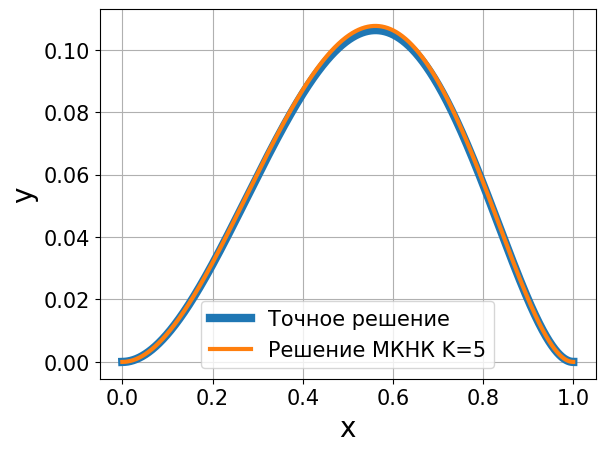

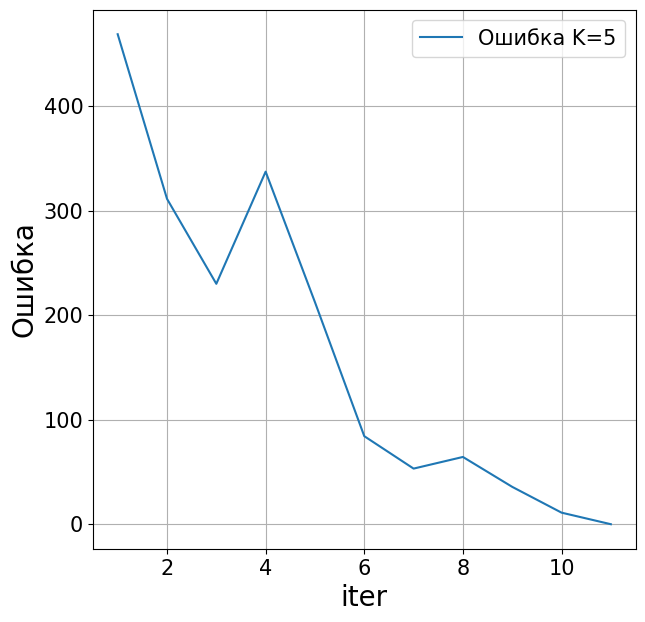

1.262474e-02
1.341892e-03

koef= 10
10
51
0.36827921867370605


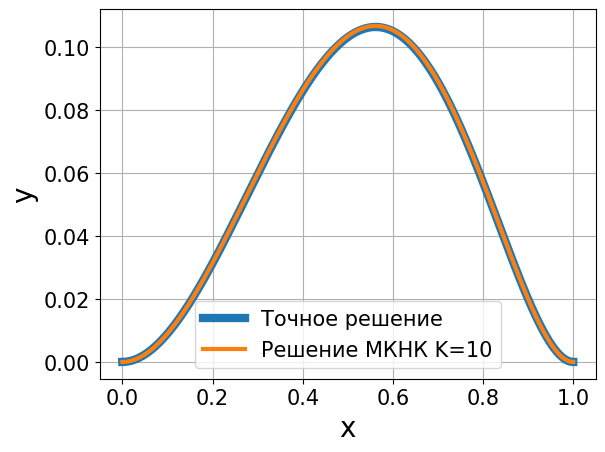

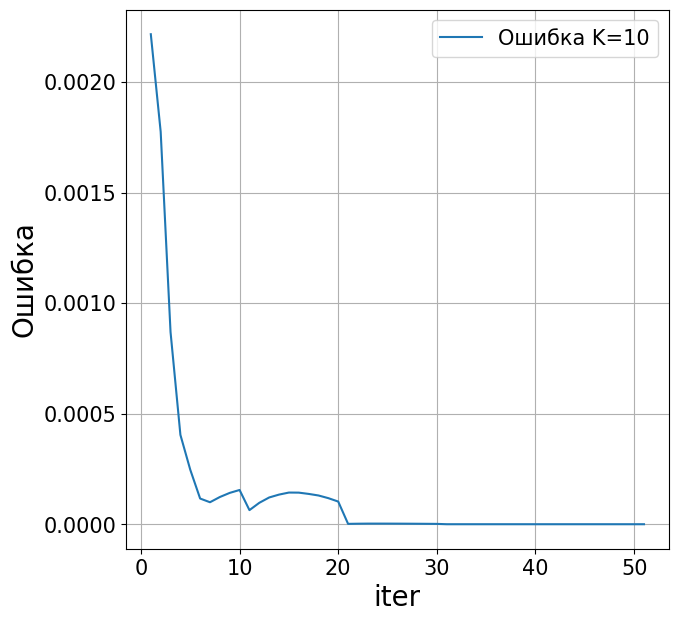

3.157699e-03
3.356339e-04
новая погрешность
2.182417e-05
2.319705e-06

koef= 10
20
831
13.116695880889893


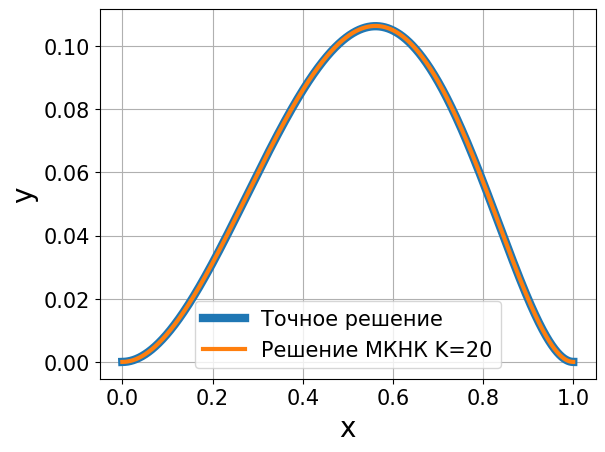

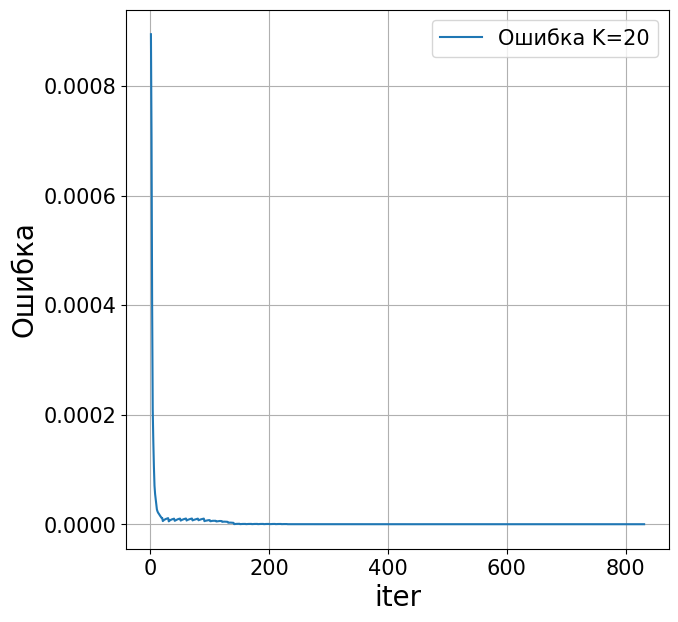

7.900271e-04
8.397249e-05
новая погрешность
8.898061e-07
9.457807e-08

koef= 10
40


KeyboardInterrupt: 

In [27]:
kk = ([5,10,20,40,80])
c = np.zeros(1)
u_old = np.zeros(1)
for k in [5,10,20,40,80]:
  #c= np.zeros(1)
  if(len(c)==1): c, u_old = MKNK(k)
  else: c, u_old = MKNK(k,c,u_old )